In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()

In [7]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [8]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.5
df.loc[mask, "Survived"] = -1

In [9]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [10]:
base_model = LogisticRegression()

In [11]:
self_training_model = SelfTrainingClassifier(base_model, criterion='k_best')

In [12]:
self_training_model.fit(X, y)

SelfTrainingClassifier(criterion='k_best', estimator=LogisticRegression())

In [13]:
df["Predicted_Label"] = self_training_model.predict(X)

In [16]:
print(df.head(20))

    Survived  Pclass  Sex   Age     Fare  Predicted_Label
0         -1       3    1  22.0   7.2500                0
1          1       1    0  38.0  71.2833                1
2          1       3    0  26.0   7.9250                1
3          1       1    0  35.0  53.1000                1
4         -1       3    1  35.0   8.0500                0
6         -1       1    1  54.0  51.8625                0
7         -1       3    1   2.0  21.0750                0
8          1       3    0  27.0  11.1333                1
9          1       2    0  14.0  30.0708                1
10         1       3    0   4.0  16.7000                1
11        -1       1    0  58.0  26.5500                1
12         0       3    1  20.0   8.0500                0
13         0       3    1  39.0  31.2750                0
14        -1       3    0  14.0   7.8542                1
15        -1       2    0  55.0  16.0000                1
16        -1       3    1   2.0  29.1250                0
18        -1  

In [15]:
!wget -q https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

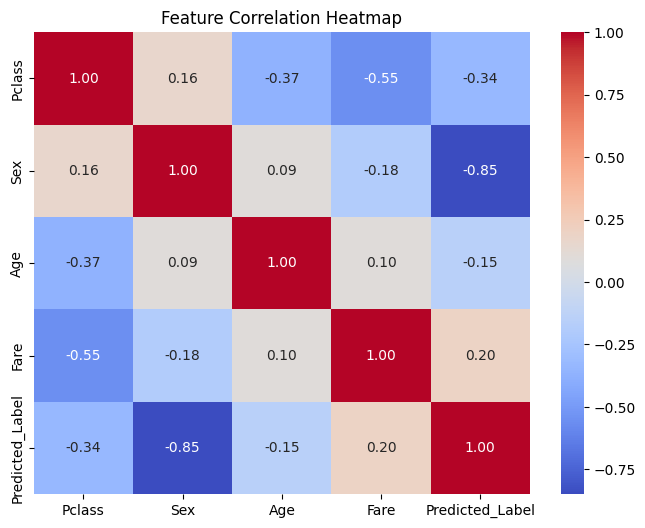

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df[["Pclass", "Sex", "Age", "Fare", "Predicted_Label"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-18-1232206585>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Predicted_Label", data=df, palette="Set2")


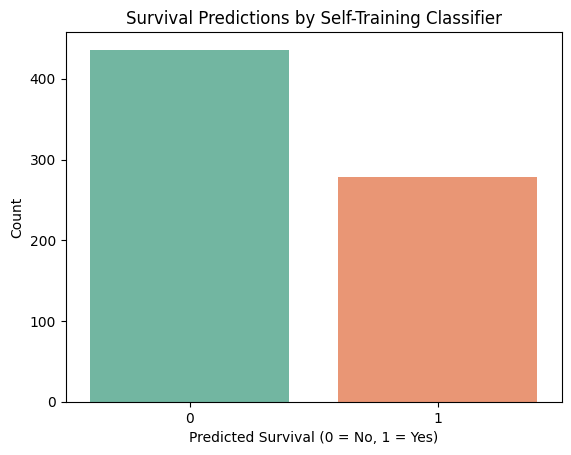

In [18]:
# Plot predicted survival counts
sns.countplot(x="Predicted_Label", data=df, palette="Set2")
plt.title("Survival Predictions by Self-Training Classifier")
plt.xlabel("Predicted Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


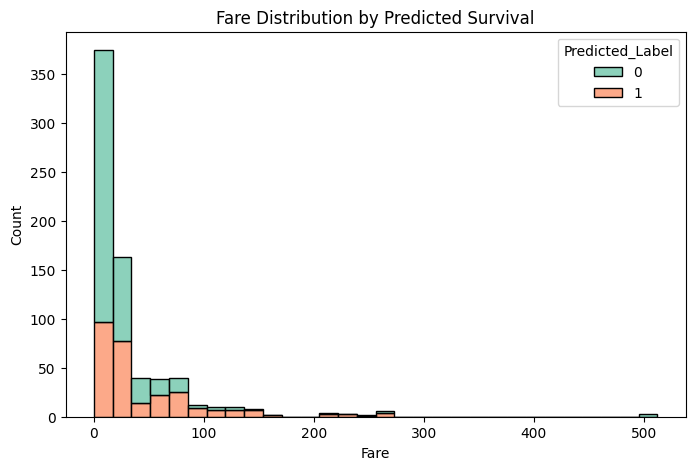

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Fare", hue="Predicted_Label", multiple="stack", bins=30, palette="Set2")
plt.title("Fare Distribution by Predicted Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()
